# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
# from keras.optimizers import SGD
# from keras.utils import to_categorical

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.style.use('dark_background')

# Data Loading

In [3]:
!git clone https://github.com/alleFarell/Datasets-ML.git

fatal: destination path 'Datasets-ML' already exists and is not an empty directory.


# Data Description

1. #3 (age) : age in years
2. #4 (sex) : sex (1 = male; 0 = female)
3. #9 (cp) : chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. #10 (trestbps) : resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) : serum cholestoral in mg/dl
6. #16 (fbs) : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. #19 (restecg) : resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
8. #32 (thalach) : maximum heart rate achieved
9. #38 (exang) : exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) : ST depression induced by exercise relative to rest
11. #41 (slope) : the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. #44 (ca) : number of major vessels (0-3) colored by flourosopy
13. #51 (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (presence) : diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [4]:
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'presence']

In [5]:
df = pd.read_csv('Datasets-ML/processed.cleveland.data', sep=',', na_values='?', names=names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
# Data  Shape
print('Total rows:', df.shape[0])
print('Total features:', df.shape[1])

Total rows: 303
Total features: 14


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
presence    0
dtype: int64

Filling Missing Values

In [9]:
df = df.fillna(method='ffill')
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

# Data Visualization

Hisplot of Data Labels

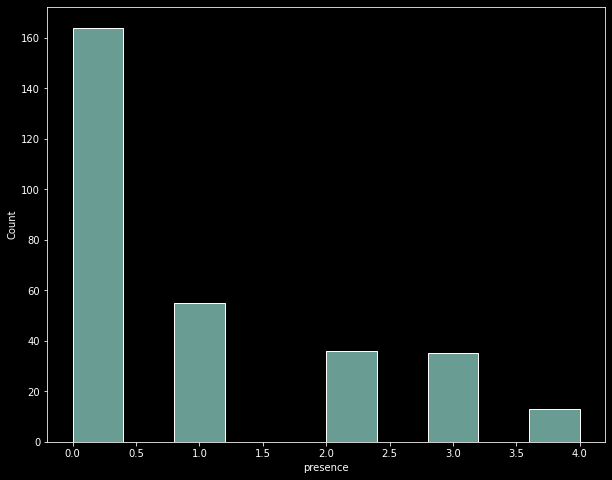

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='presence')

Age vs Maximum Heart Rate Archived Groupped by Diease Presence

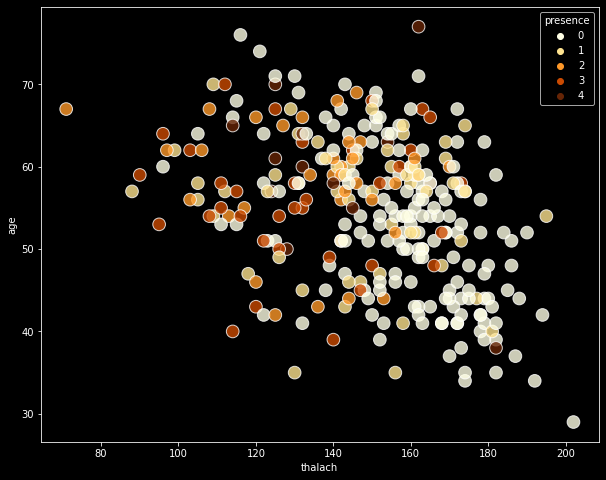

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['thalach'], y=df['age'], hue=df['presence'], s=160, palette='YlOrBr', alpha=0.8)

## Data Prepare

In [12]:
features = df.columns[0:13].to_list()
labels = df.columns[-1:14].to_list()

In [13]:
X = df[features]
y = df[labels]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling With Keras

### Define Model

In [41]:
model = Sequential([
                    Dense(units=16, input_dim=13, activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=5, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training Model

In [44]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=len(X_train), epochs=100, shuffle=True, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 1.5150 - accuracy: 0.3585 - val_loss: 1.4559 - val_accuracy: 0.3736
Epoch 2/100
1/1 - 0s - loss: 1.5009 - accuracy: 0.3774 - val_loss: 1.4451 - val_accuracy: 0.3846
Epoch 3/100
1/1 - 0s - loss: 1.4871 - accuracy: 0.4009 - val_loss: 1.4345 - val_accuracy: 0.4176
Epoch 4/100
1/1 - 0s - loss: 1.4736 - accuracy: 0.4104 - val_loss: 1.4241 - val_accuracy: 0.4286
Epoch 5/100
1/1 - 0s - loss: 1.4603 - accuracy: 0.4198 - val_loss: 1.4139 - val_accuracy: 0.4725
Epoch 6/100
1/1 - 0s - loss: 1.4472 - accuracy: 0.4340 - val_loss: 1.4038 - val_accuracy: 0.4725
Epoch 7/100
1/1 - 0s - loss: 1.4342 - accuracy: 0.4528 - val_loss: 1.3939 - val_accuracy: 0.4945
Epoch 8/100
1/1 - 0s - loss: 1.4214 - accuracy: 0.4764 - val_loss: 1.3841 - val_accuracy: 0.5055
Epoch 9/100
1/1 - 0s - loss: 1.4089 - accuracy: 0.4906 - val_loss: 1.3742 - val_accuracy: 0.5385
Epoch 10/100
1/1 - 0s - loss: 1.3965 - accuracy: 0.4906 - val_loss: 1.3646 - val_accuracy: 0.5495
Epoch 11/100
1/1 - 0s - loss:

### Evaluate Model

In [45]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.660, Test Accuracy: 0.549


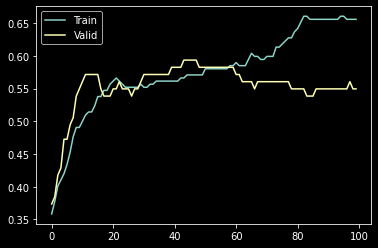

In [46]:
# plot training history

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()